# Hands-on Image Processing with Python
## Chapter 9: Classical Machine Learning Methods in Image Processing

306


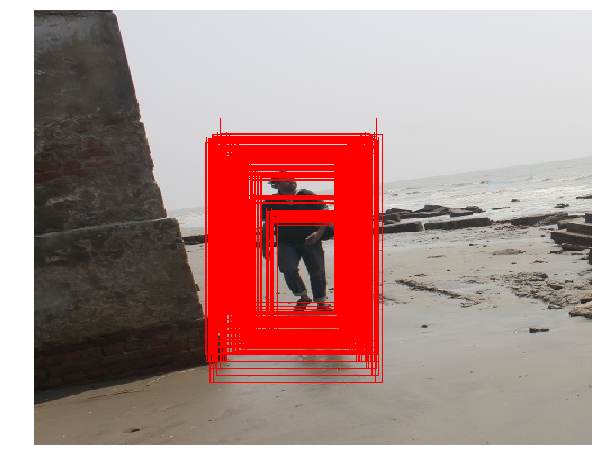

(<matplotlib.image.AxesImage at 0x25b822769e8>,
 (-0.5, 495.5, 525.5, -0.5),
 None)

In [282]:
import cv2
import matplotlib.pylab as plt 

# read in test image (from Microsoft COCO database)
img = cv2.imread("../my images/me17.jpg")

# create HOG descriptor using default people (pedestrian) detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# run detection, using a spatial stride of 4 pixels (horizontal and verticle), a scale stride of 1.02, and zero grouping of
# rectangles (to demonstrate that HOG will detect at potentially multiple places in the scale pyramid)
#img = cv2.resize(img, (0,0), fx=0.5, fy=0.5) 
#(foundBoundingBoxes, weights) = hog.detectMultiScale(img, winStride=(4, 4), padding=(8, 8), scale=2, finalThreshold=0, useMeanshiftGrouping=True)
(foundBoundingBoxes, weights) = hog.detectMultiScale(img, winStride=(4, 4), padding=(8, 8), scale=1.02, finalThreshold=0, useMeanshiftGrouping=False)

print(len(foundBoundingBoxes))
# we're going to copy the original test image to draw bounding boxes on it for now, as we'll use it again later
imgWithRawBboxes = img.copy()
for (hx, hy, hw, hh) in foundBoundingBoxes:
        cv2.rectangle(imgWithRawBboxes, (hx, hy), (hx + hw, hy + hh), (0, 0, 255), 1)
        
#plt.figure(figsize=(14, 10), dpi=80)
plt.figure(figsize=(10, 8))#, dpi=80)
imgWithRawBboxes = cv2.cvtColor(imgWithRawBboxes, cv2.COLOR_BGR2RGB)

plt.imshow(imgWithRawBboxes, aspect='auto'), plt.axis('off'), plt.show()

Before suppression, we had 306 bounding boxes, after suppression we have 1


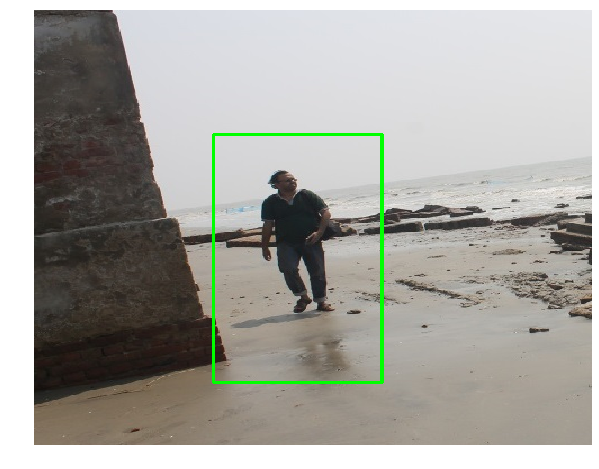

In [283]:
import numpy as np
from imutils.object_detection import non_max_suppression

# convert our bounding boxes from format (x1, y1, w, h) to (x1, y1, x2, y2)
rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in foundBoundingBoxes])

# run non-max suppression on these based on an overlay op 65%
nmsBoundingBoxes = non_max_suppression(rects, probs=None, overlapThresh=0.65)

print ("Before suppression, we had {} bounding boxes, after suppression we have {}".format(len(rects), len(nmsBoundingBoxes)))

# draw the final bounding boxes
for (xA, yA, xB, yB) in nmsBoundingBoxes:
    cv2.rectangle(img, (xA, yA), (xB, yB), (0, 255, 0), 2)

# and show our work
plt.figure(figsize=(10, 8)) #, dpi=80)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, aspect='auto') 
plt.axis('off')
plt.show()

(400, 4096)


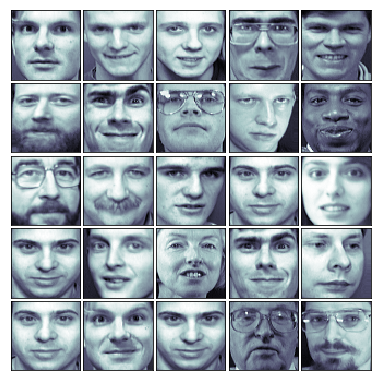

In [135]:
from sklearn.datasets import fetch_olivetti_faces 
faces = fetch_olivetti_faces().data
print(faces.shape) # there are 400 faces each of them is of 64x64=4096 pixels
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#faces = scaler.fit_transform(faces)
fig = plt.figure(figsize=(5,5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot 25 random faces
j = 1
np.random.seed(0)
for i in np.random.choice(range(faces.shape[0]), 25): 
    ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(faces[i,:],(64,64)), cmap=plt.cm.bone, interpolation='nearest') 
    j += 1
plt.show()
#print(faces.keys())
#print(faces.data.shape)
#print(len(faces.images))
#from sklearn.datasets import fetch_lfw_people 
#lfw=fetch_lfw_people() 
#print(lfw.keys())

(400, 64)


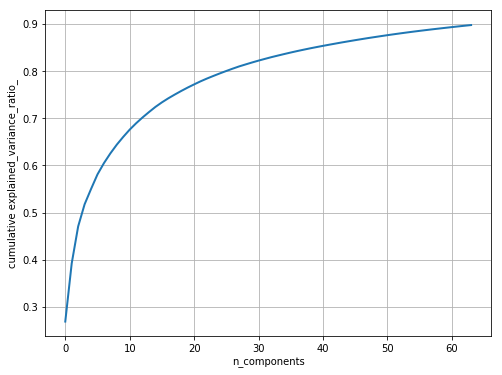

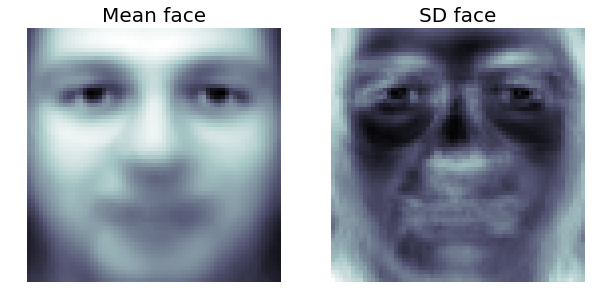

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
n_comp =64
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=n_comp))])
faces_proj = pipeline.fit_transform(faces)
print(faces_proj.shape)
mean_face = np.reshape(pipeline.named_steps['scaling'].mean_, (64,64))
sd_face = np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (64,64))
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pipeline.named_steps['pca'].explained_variance_ratio_), linewidth=2)
plt.grid(), plt.axis('tight'), plt.xlabel('n_components'), plt.ylabel('cumulative explained_variance_ratio_')
plt.show()
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(mean_face, cmap=plt.cm.bone, interpolation='nearest'), plt.axis('off'), plt.title('Mean face', size=20)
plt.subplot(122), plt.imshow(sd_face, cmap=plt.cm.bone, interpolation='nearest'), plt.axis('off'), plt.title('SD face', size=20)
plt.show()

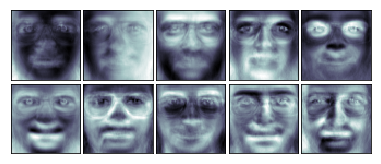

In [140]:
fig = plt.figure(figsize=(5,2)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the first 10 eigenfaces
for i in range(10): 
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pipeline.named_steps['pca'].components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

In [148]:
len(face_sd)

4096

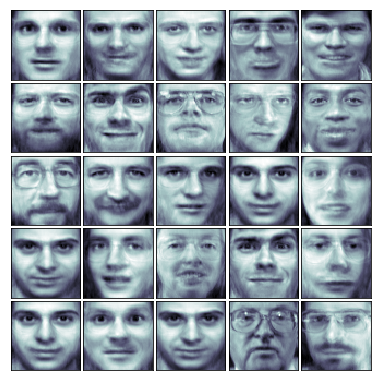

In [153]:
# face reconstruction
faces_inv_proj = pipeline.named_steps['pca'].inverse_transform(faces_proj) 
#reshaping as 400 images of 64x64 dimension 
fig = plt.figure(figsize=(5,5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the faces, each image is 64 by 64 dimension but 8x8 pixels 
j = 1
np.random.seed(0)
for i in np.random.choice(range(faces.shape[0]), 25): 
    ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[]) 
    ax.imshow(mean_face + sd_face*np.reshape(faces_inv_proj,(400,64,64)) [i,:], cmap=plt.cm.bone, interpolation='nearest')
    j += 1

(64,)
(64, 4096)


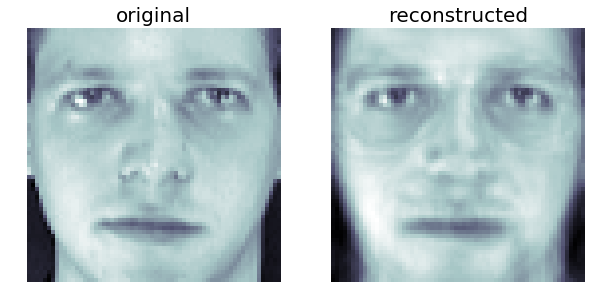

In [168]:
print(faces_proj[0,:].shape)
print(pipeline.named_steps['pca'].components_.shape)
orig_face = np.reshape(faces[0,:], (64,64))
reconst_face = np.reshape(faces_proj[0,:]@pipeline.named_steps['pca'].components_, (64,64))
reconst_face = mean_face + sd_face*reconst_face
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(orig_face, cmap=plt.cm.bone, interpolation='nearest'), plt.axis('off'), plt.title('original', size=20)
plt.subplot(122), plt.imshow(reconst_face, cmap=plt.cm.bone, interpolation='nearest'), plt.axis('off'), plt.title('reconstructed', size=20)
plt.show()

((0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x25be0578198>)

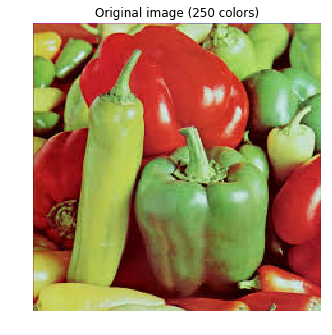

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from skimage.io import imread
from sklearn.utils import shuffle
from skimage import img_as_float

pepper = imread("../images/pepper.jpg")
# Convert to floats instead of the default 8 bits integer coding, so that 
# plt.imshow behaves works well on float data (need to be in the range [0-1])
pepper = img_as_float(pepper)
# Load Image and transform to a 3D numpy array.
w, h, d = original_shape = tuple(pepper.shape)
assert d == 3
image_array = np.reshape(pepper, (w * h, d))

def recreate_image(codebook, labels, w, h):
 """Recreate the (compressed) image from the code book & labels"""
 d = codebook.shape[1]
 image = np.zeros((w, h, d))
 label_idx = 0
 for i in range(w):
     for j in range(h):
         image[i][j] = codebook[labels[label_idx]]
 label_idx += 1
 return image

# Display all results, alongside original image
plt.figure(1), plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off'), plt.title('Original image (%d colors)' %(len(np.unique(pepper)))), plt.imshow(pepper)

(1797, 64)


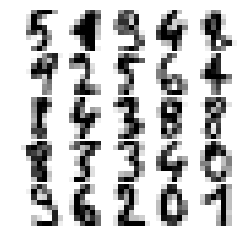

In [213]:
from sklearn.datasets import load_digits 
digits = load_digits() 
#print(digits.keys())
print(digits.data.shape)
j = 1
np.random.seed(1)
fig = plt.figure(figsize=(3,3)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
for i in np.random.choice(digits.data.shape[0], 25):
    plt.subplot(5,5,j), plt.imshow(np.reshape(digits.data[i,:], (8,8)), cmap='binary'), plt.axis('off')
    j += 1
plt.show()

(25, 8, 8)


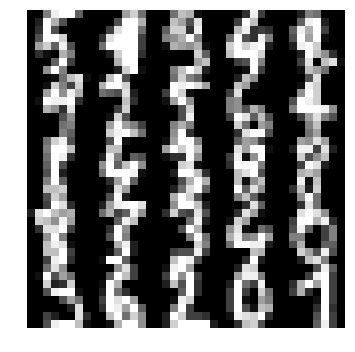

In [227]:
from skimage.util import montage
digit_images = np.zeros((25, 8, 8))
np.random.seed(1)
indices = np.random.choice(digits.data.shape[0], 25)
for i in range(len(digit_images)): 
  digit_images[i,:,:] = np.reshape(digits.data[indices[i],:], (8,8))
print(digit_images.shape)
digit_images_montage = montage(digit_images, rescale_intensity=True, multichannel=False)
plt.figure(figsize=(5,5)) 
plt.imshow(digit_images_montage)
plt.axis('off')
plt.tight_layout()
plt.show()

0.285093648237


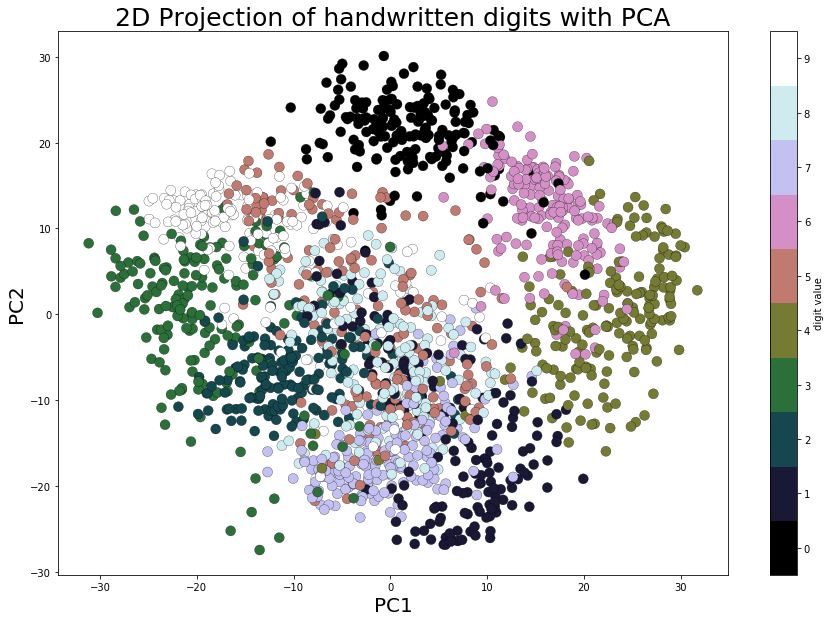

In [218]:
pca_digits=PCA(2)
digits.data_proj = pca_digits.fit_transform(digits.data) 
#from sklearn.manifold import Isomap
#iso = Isomap(n_components=2)
#digits.data_proj = iso.fit_transform(digits.data)
print(np.sum(pca_digits.explained_variance_ratio_))
plt.figure(figsize=(15,10))
plt.scatter(digits.data_proj[:, 0], digits.data_proj[:, 1], lw=0.25, c=digits.target, edgecolor='k',  s=100, cmap=plt.cm.get_cmap('cubehelix', 10))
plt.xlabel('PC1', size=20), plt.ylabel('PC2', size=20), plt.title('2D Projection of handwritten digits with PCA', size=25)
plt.colorbar(ticks=range(10), label='digit value')
plt.clim(-0.5, 9.5)

Automatically created module for IPython interactive environment
done in 0.281s.
Predicting color indices on the full image (k-means)
done in 0.024s.
done in 0.256s.
Predicting color indices on the full image (k-means)
done in 0.018s.
done in 0.150s.
Predicting color indices on the full image (k-means)
done in 0.009s.
done in 0.213s.
Predicting color indices on the full image (k-means)
done in 0.007s.


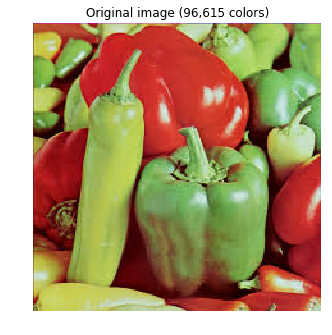

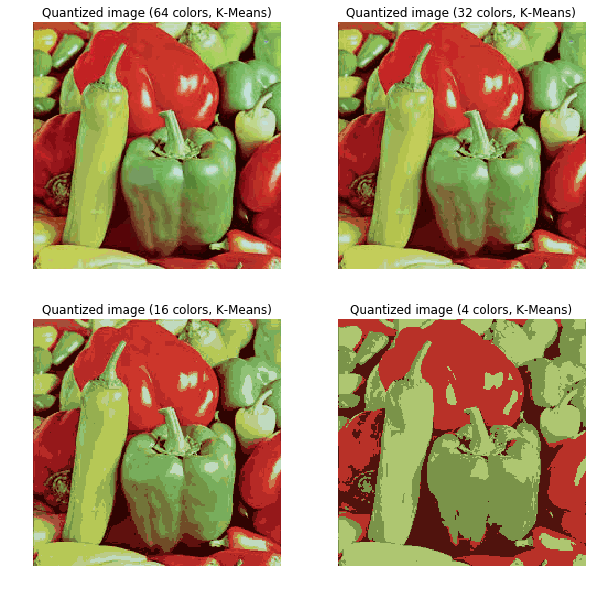

Predicting color indices on the full image (random)
done in 0.030s.
Predicting color indices on the full image (random)
done in 0.016s.
Predicting color indices on the full image (random)
done in 0.012s.
Predicting color indices on the full image (random)
done in 0.013s.


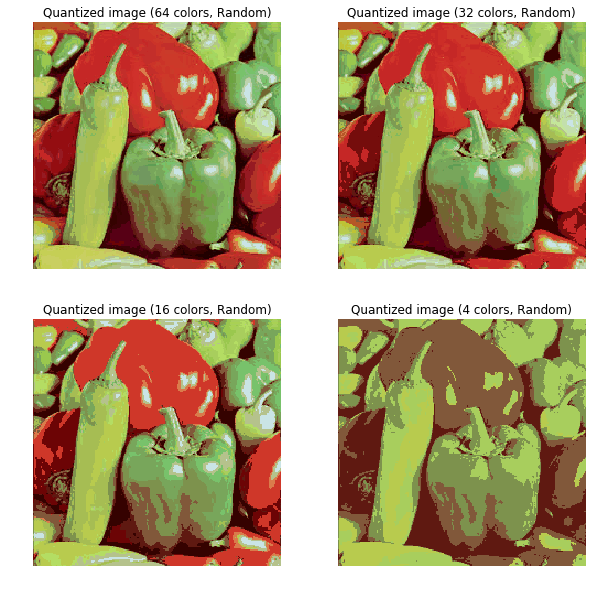

In [228]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
#from sklearn.datasets import load_sample_image
from skimage.io import imread
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Load the Summer Palace photo
pepper = imread("../images/pepper.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
pepper = np.array(pepper, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(pepper.shape)
assert d == 3
image_array = np.reshape(pepper, (w * h, d))

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(pepper)

plt.figure(2, figsize=(10,10))
plt.clf()
i = 1
for k in [64, 32, 16, 4]:
    t0 = time()
    plt.subplot(2,2,i)
    plt.axis('off')
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=k, random_state=0).fit(image_array_sample)
    print("done in %0.3fs." % (time() - t0))
    # Get labels for all points
    print("Predicting color indices on the full image (k-means)")
    t0 = time()
    labels = kmeans.predict(image_array)
    print("done in %0.3fs." % (time() - t0))
    plt.title('Quantized image (' + str(k) + ' colors, K-Means)')
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    i += 1
plt.show()

        
plt.figure(3, figsize=(10,10))
plt.clf()
i = 1
for k in [64, 32, 16, 4]:
    t0 = time()
    plt.subplot(2,2,i)
    plt.axis('off')
    codebook_random = shuffle(image_array, random_state=0)[:k + 1]
    print("Predicting color indices on the full image (random)")
    t0 = time()
    labels_random = pairwise_distances_argmin(codebook_random,
                                              image_array,
                                              axis=0)
    print("done in %0.3fs." % (time() - t0))    
    plt.title('Quantized image (' + str(k) + ' colors, Random)')
    plt.imshow(recreate_image(codebook_random, labels_random, w, h))
    i += 1
plt.show()

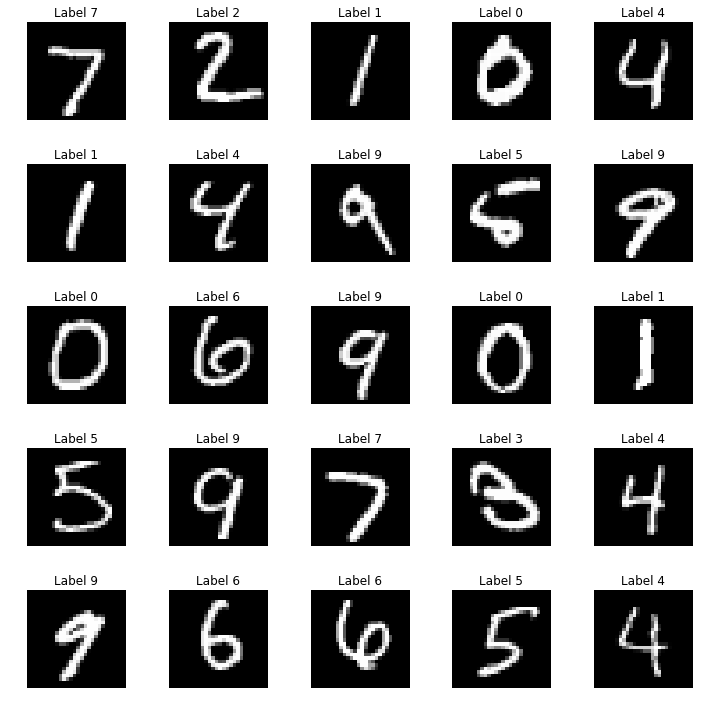

In [229]:
%matplotlib inline
import matplotlib.pyplot as plt 
import gzip, os, sys
import numpy as np
from scipy.stats import multivariate_normal

if sys.version_info[0] == 2:
    from urllib import urlretrieve
else:
    from urllib.request import urlretrieve
    
# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

## Load the training set
#path = 'C:\Courses\Edx\Current\USCD ML\Week3\\'
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

## Define a function that displays a digit given its vector representation
def show_digit(x, label):
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.title('Label ' + str(label))
    #plt.show()
    #return

## Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    if(dataset=="train"): 
        label = train_labels[index]
        show_digit(train_data[index,], label)
    else:
        label = test_labels[index]
        show_digit(test_data[index,], label)
    #print("Label " + str(label))
    plt.show()
    return

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    #show_digit(train_data[i,], train_labels[i])
    show_digit(test_data[i,], test_labels[i])
plt.tight_layout()
plt.show()

In [ ]:
import time
from sklearn.neighbors import BallTree

## Build nearest neighbor structure on training data
t_before = time.time()
ball_tree = BallTree(train_data)
t_after = time.time()

## Compute training time
t_training = t_after - t_before
print("Time to build data structure (seconds): ", t_training)

## Get nearest neighbor predictions on testing data
t_before = time.time()
test_neighbors = np.squeeze(ball_tree.query(test_data, k=1, return_distance=False))
test_predictions = train_labels[test_neighbors]
t_after = time.time()

## Compute testing time
t_testing = t_after - t_before
print("Time to classify test set (seconds): ", t_testing)

import pandas as pd
import seaborn as sn
from sklearn import metrics
cm=metrics.confusion_matrix(test_labels,test_predictions)
#print(cm)
df_cm = pd.DataFrame(cm, range(10), range(10))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g") #, cmap='viridis')# font size

t_error =  sum(test_predictions == test_labels) / float(len(test_labels))
t_error

from collections import Counter
ks = list(range(11))
t_trainings = [0]
t_testings = [0]
t_errors = [0]
for k in ks[1:]:
    test_neighbors = np.squeeze(ball_tree.query(test_data, k=k, return_distance=False))
    test_predictions = Counter([train_labels[test_neighbor] for test_neighbor in test_neighbors]).most_common(1)[0][0]
    t_error =  sum(test_predictions != test_labels) / float(len(test_labels))
    print(k, t_error)
    t_errors.append(t_error)
    
plt.plot(ks[1:], t_errors[1:])
plt.xlabel('k')
plt.xlabel('k')
plt.ylabel('error')
plt.show()

In [231]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

def fit_generative_model(x,y):
    k = 10  # labels 0,1,...,k-1
    d = (x.shape)[1]  # number of features
    mu = np.zeros((k,d))
    sigma = np.zeros((k,d,d))
    pi = np.zeros(k)
    c = 3500 #10000 #1000 #100 #10 #0.1 #1e9
    for label in range(k):
        indices = (y == label)
        pi[label] = sum(indices) / float(len(y))
        mu[label] = np.mean(x[indices,:], axis=0)
        sigma[label] = np.cov(x[indices,:], rowvar=0, bias=1) + c*np.eye(d)
    # Halt and return parameters
    return mu, sigma, pi

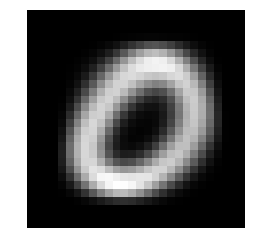

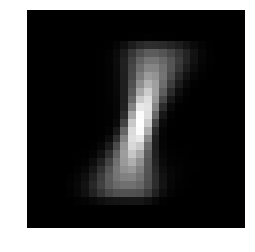

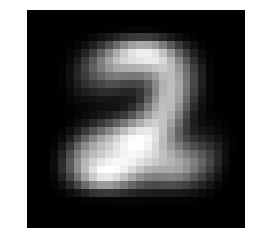

In [232]:
mu, sigma, pi = fit_generative_model(train_data, train_labels)
displaychar(mu[0])
displaychar(mu[1])
displaychar(mu[2])

In [236]:
# Compute log Pr(label|image) for each [test image,label] pair.
k = 10
score = np.zeros((len(test_labels),k))
for label in range(0,k):
    rv = multivariate_normal(mean=mu[label], cov=sigma[label])
    for i in range(0,len(test_labels)):
       score[i,label] = np.log(pi[label]) + rv.logpdf(test_data[i,:])
test_predictions = np.argmax(score, axis=1)
# Finally, tally up score
errors = np.sum(test_predictions != test_labels)
print("The generative model makes " + str(errors) + " errors out of 10000")
t_accuracy = sum(test_predictions == test_labels) / float(len(test_labels))
t_accuracy

The generative model makes 438 errors out of 10000


0.95620000000000005

In [237]:
print(train_data.shape)
print(test_data.shape)

(60000, 784)
(10000, 784)


In [240]:
from sklearn.svm import SVC
C = 1
#for C in [.01,.1,1.,10.,100.]:
clf = SVC(C=C, kernel='poly', degree=2)
clf.fit(train_data,train_labels)
print(C, clf.score(test_data,test_labels))

1 0.9806


In [239]:
C = 1
clf = SVC(C=C)
clf.fit(train_data,train_labels)
print(C, clf.score(test_data,test_labels))

1 0.1135


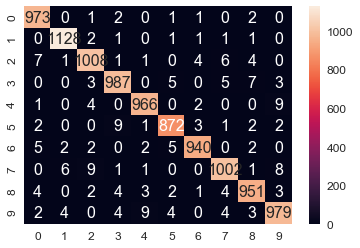

In [241]:
import pandas as pd
import seaborn as sn
from sklearn import metrics
test_predictions = clf.predict(test_data)
cm=metrics.confusion_matrix(test_labels,test_predictions)
df_cm = pd.DataFrame(cm, range(10), range(10))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g") #, cmap='viridis')# font size

194


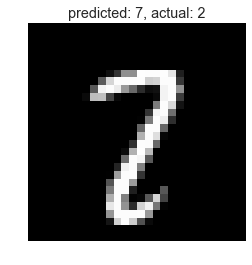

In [247]:
wrong_indices = test_predictions != test_labels
wrong_digits, wrong_preds, correct_labs = test_data[wrong_indices], test_predictions[wrong_indices], test_labels[wrong_indices] 
print(len(wrong_pred))
plt.title('predicted: ' + str(wrong_preds[1]) + ', actual: ' + str(correct_labs[1]))
displaychar(wrong_digits[1])

In [248]:
from __future__ import division, print_function
from time import time

import numpy as np
import matplotlib.pyplot as plt

from dask import delayed

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from skimage.data import lfw_subset
from skimage.transform import integral_image
from skimage.feature import haar_like_feature
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature

@delayed
def extract_feature_image(img, feature_type, feature_coord=None):
    """Extract the haar feature for the current image"""
    ii = integral_image(img)
    return haar_like_feature(ii, 0, 0, ii.shape[0], ii.shape[1],
                             feature_type=feature_type,
                             feature_coord=feature_coord)

images = lfw_subset()
print(images.shape)

(200, 25, 25)


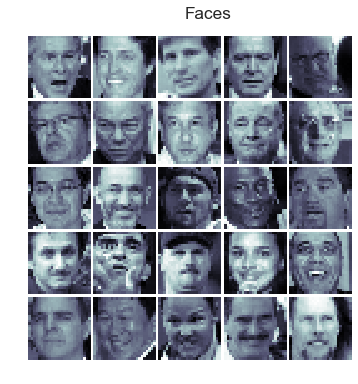

In [279]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=0.9, bottom=0, top=0.9, hspace=0.05, wspace=0.05) 
for i in range(25):
    plt.subplot(5,5,i+1), plt.imshow(images[i,:,:], cmap='bone'), plt.axis('off')
plt.suptitle('Faces')
plt.show()

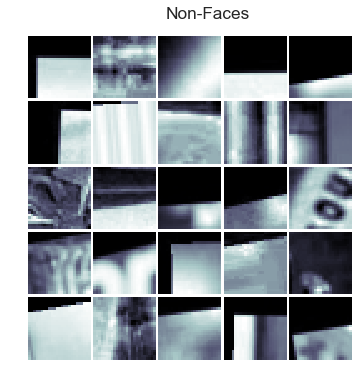

In [280]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=0.9, bottom=0, top=0.9, hspace=0.05, wspace=0.05) 
for i in range(100,125):
    plt.subplot(5,5,i-99), plt.imshow(images[i,:,:], cmap='bone'), plt.axis('off')
plt.suptitle('Non-Faces')
plt.show()

In [254]:
# For speed, only extract the two first types of features
feature_types = ['type-2-x', 'type-2-y']

# Build a computation graph using dask. This allows using multiple CPUs for
# the computation step
X = delayed(extract_feature_image(img, feature_types)
            for img in images)
# Compute the result using the "processes" dask backend
t_start = time()
X = np.array(X.compute(scheduler='processes'))
time_full_feature_comp = time() - t_start
y = np.array([1] * 100 + [0] * 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=150,
                                                    random_state=0,
                                                    stratify=y)
print(time_full_feature_comp)
print(X.shape, X_train.shape, y_train.shape)

104.87986302375793
(200, 101088) (150, 101088) (150,)


C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [281]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Extract all possible features to be able to select the most salient.
feature_coord, feature_type = \
        haar_like_feature_coord(width=images.shape[2], height=images.shape[1],
                                feature_type=feature_types)
    
# Train a random forest classifier and check performance
clf = RandomForestClassifier(n_estimators=1000, max_depth=None,
                             max_features=100, n_jobs=-1, random_state=0)
t_start = time()
clf.fit(X_train, y_train)
time_full_train = time() - t_start
auc_full_features = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print(auc_full_features)

1.0


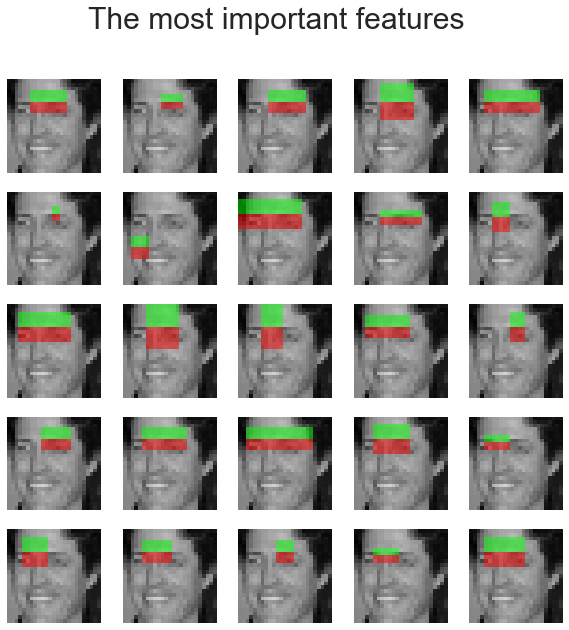

In [267]:
# Sort features in order of importance, plot six most significant
idx_sorted = np.argsort(clf.feature_importances_)[::-1]

fig, axes = plt.subplots(5, 5, figsize=(10,10))
for idx, ax in enumerate(axes.ravel()):
    image = images[1]
    image = draw_haar_like_feature(image, 0, 0,
                                   images.shape[2],
                                   images.shape[1],
                                   [feature_coord[idx_sorted[idx]]])
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle('The most important features', size=30)